帰無仮説：新型端末の2年間使用におけるバッテリー減少量の平均は20時間である

対立仮説：新型端末の2年間使用におけるバッテリー減少量の平均は20時間とは異なる

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
sns.set_theme()

In [2]:
data = pd.read_csv('batteries_hours.csv')

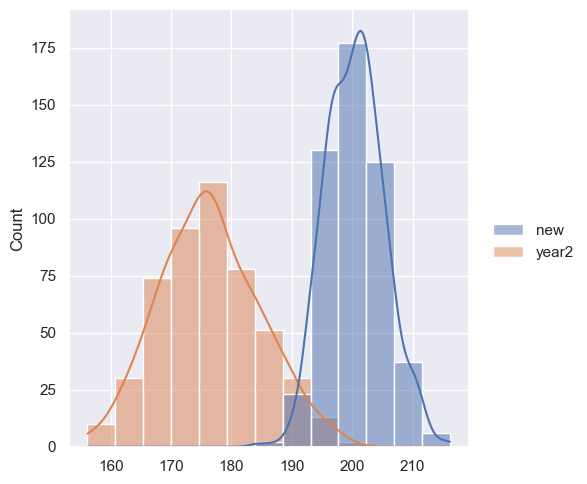

In [3]:
sns.displot(data, kde=True)

In [4]:
#母平均の推定値
#new 
mu_new = data['new'].mean()
print('newの母平均の推定値：', mu_new)

#year2
mu_year2 = data['year2'].mean()
print('year2の母平均の推定値：', mu_year2)

#95%信頼区間の下限値と上限値
#自由度（標本 - 1）
df = len(data) - 1

#new
sigma_new =data['new'].std(ddof=1)
se_new = sigma_new / np.sqrt(len(data))
interval_new = stats.t.interval(0.95, df, loc=mu_new, scale=se_new)
print('newの95%信頼区間：', interval_new)

#year2
sigma_year2 =data['year2'].std(ddof=1)
se_year2 = sigma_year2 / np.sqrt(len(data))
interval_year2 = stats.t.interval(0.95, df, loc=mu_year2, scale=se_year2)
print('year2の95%信頼区間：', interval_year2)

newの母平均の推定値： 200.4746372262155
year2の母平均の推定値： 176.4021507111103
newの95%信頼区間： (np.float64(200.0533518842937), np.float64(200.89592256813728))
year2の95%信頼区間： (np.float64(175.67364051788377), np.float64(177.13066090433682))


In [5]:
data['difference'] = data['new'] - data['year2']

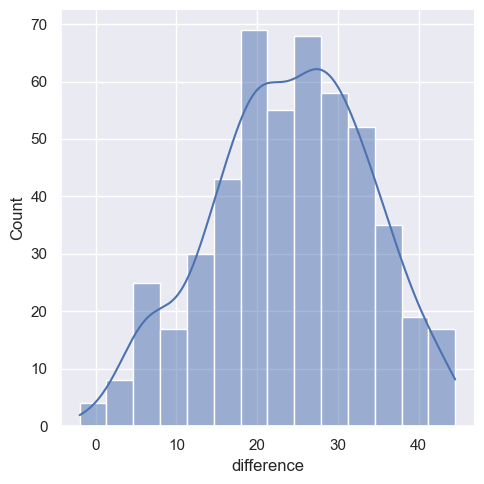

In [6]:
sns.displot(data['difference'], kde=True)

In [7]:
#T検定
stats.ttest_1samp(data['difference'], 20)


TtestResult(statistic=np.float64(9.465273816769793), pvalue=np.float64(1.1594662512929281e-19), df=np.int64(499))

P値は0.01％を大きく下回る結果となり、有意差がある

よって帰無仮説を棄却し、対立仮説を採用する

新型端末の2年間使用におけるバッテリー減少量の平均は20時間とは異なり、
2年間で1割程度しか減少しないとは言えない